In [34]:
import pandas as pd
import os
import math

# 2009-2010 ASSISTment Data

In [35]:
data_dir = '/Users/tianqiyan/Documents/DeepLearning/cs230/project'

data_nonskill = pd.read_csv(os.path.join(data_dir, 'non_skill_builder_data_new.csv'))
data_skill = pd.read_csv(os.path.join(data_dir, 'skill_builder_data.csv'))

/Users/tianqiyan/opt/anaconda3/envs/ML/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pd.set_option('display.max_columns', 500)

In [36]:
data_skill.head(20)

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,algebra,5948,13241,126,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,algebra,5948,13241,126,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,3,4,124564,30060,NaN,65,0,0.0,3,3.0
5,35450555,220674,70363,33172,51457,1,1,1,16031,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,4,16031,30060,NaN,12,0,NaN,4,4.0
6,35450573,220674,70363,33174,51459,1,1,1,15047,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,4,15047,30060,NaN,6,0,NaN,5,5.0
7,35480603,220674,70363,33123,51408,1,1,1,10732,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,3,10732,30059,NaN,55,0,NaN,6,6.0
8,33140811,220674,70677,33168,51453,1,1,1,23241,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,4,23241,30060,NaN,12,0,NaN,1,1.0
9,33140919,220674,70677,33112,51397,1,1,1,11512,tutor,algebra,5948,11816,22,MasterySection,5948,1.0,Box and Whisker,22763,73,0,2,11512,30059,NaN,36,0,NaN,2,2.0


In [37]:
print('missing skill tag')
data_skill[data_skill.skill_name.isnull()]

missing skill tag


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
94047,21617623,263599,14,53412,93383,1,0,1,26271,tutor,algebra,7118,12495,1,MasterySection,7118,37.0,NaN,42972,1,2,2,41131,52570,NaN,NaN,1,1.0,1,1.0
94048,21617632,263599,14,53436,93407,1,1,1,29123,tutor,algebra,7118,12495,1,MasterySection,7118,37.0,NaN,42972,1,0,2,29123,52570,NaN,82.8,0,NaN,2,2.0
94049,21617641,263599,14,53429,93400,1,0,1,13779,tutor,algebra,7118,12495,1,MasterySection,7118,37.0,NaN,42972,1,2,2,19905,52570,NaN,NaN,1,1.0,3,3.0
94050,21617650,263599,14,53448,93419,1,0,1,16901,tutor,algebra,7118,12495,1,MasterySection,7118,37.0,NaN,42972,1,2,2,22600,52570,NaN,NaN,1,1.0,4,4.0
94051,21617659,263599,14,53449,93420,1,0,1,11079,tutor,algebra,7118,12495,1,MasterySection,7118,37.0,NaN,42972,1,2,2,19704,52570,NaN,NaN,1,1.0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525529,38214014,291495,96299,57830,108976,0,1,1,38234,tutor,choose_1,6009,14415,39,MasterySection,6009,NaN,NaN,69274,2770,0,2,38234,55692,200260.0,NaN,0,NaN,54,NaN
525530,38214016,291495,96299,57843,109015,0,1,1,6500,tutor,choose_1,6009,14415,39,MasterySection,6009,NaN,NaN,69274,2770,0,0,6500,55693,200299.0,NaN,0,NaN,55,NaN
525531,38214195,291503,96299,34577,54060,0,1,1,18344,tutor,algebra,5962,14415,16,MasterySection,5962,NaN,NaN,69274,2770,0,3,18344,30677,NaN,0.8,0,NaN,56,NaN
525532,38214196,291503,96299,34577,54061,0,1,1,12922,tutor,algebra,5962,14415,16,MasterySection,5962,NaN,NaN,69274,2770,0,2,12922,30677,NaN,-6,0,NaN,57,NaN


In [69]:
data_skill_good = data_skill[data_skill.skill_id.notnull()]
skill_set_names = data_skill_good[data_skill_good.skill_name.notnull()][['skill_id','skill_name']].drop_duplicates()

In [70]:
skill_set_names.columns = ['skill_id', 'skill_name2']
skill_set_names

,skill_id,skill_name2
0,1.0,Box and Whisker
3957,2.0,Circle Graph
10165,4.0,Histogram as Table or Graph
11969,5.0,Number Line
13864,8.0,Scatter Plot
...,...,...
454630,365.0,Interpreting Coordinate Graphs
455061,368.0,Solving for a variable
456853,371.0,Simplifying Expressions positive exponents
456961,375.0,Solving Inequalities


In [72]:
data_skill_good[data_skill_good.skill_name.isnull()][['skill_id','skill_name']].drop_duplicates()

,skill_id,skill_name
94047,37.0,NaN
208727,76.0,NaN
248875,91.0,NaN
256850,94.0,NaN
258383,96.0,NaN
259226,97.0,NaN
259457,99.0,NaN
259689,101.0,NaN
261021,102.0,NaN
261022,104.0,NaN


In [73]:
data_skill = data_skill_good

In [76]:
print('Number of rows : {}'.format(len(data_skill)))
print('Number of records : {}'.format(len(set(data_skill.order_id))))
print('Number of users : {}'.format(len(set(data_skill.user_id))))
print('Number of problem sets : {}'.format(len(set(data_skill.sequence_id))))
print('Number of problems : {}'.format(len(set(data_skill.problem_id))))
print('Number of skills : {}'.format(len(set(data_skill.skill_id))))
print('Number of answer types : {}'.format(len(set(data_skill.answer_type))))

Number of rows : 459208
Number of records : 283105
Number of users : 4163
Number of problem sets : 620
Number of problems : 17751
Number of skills : 123
Number of answer types : 5


In [79]:
data_skill[(data_skill.hint_count > 0) & (data_skill.correct == 1)]

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,answer_type,sequence_id,student_class_id,position,type,base_sequence_id,skill_id,skill_name,teacher_id,school_id,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
69592,33721011,279721,89930,74881,139503,0,1,5,35380,tutor,choose_1,10666,13481,25,MasterySection,10666,17.0,Probability of Two Distinct Events,62006,5451,1,1,35380,58408,256392.0,NaN,0,0.0,6,NaN
69813,34313880,279721,90506,74891,139553,0,1,1,21453,tutor,choose_1,10666,13481,25,MasterySection,10666,17.0,Probability of Two Distinct Events,62006,5451,1,1,21453,58408,256442.0,NaN,0,0.0,2,NaN
69860,34317324,279721,90520,74882,139508,0,1,1,45218,tutor,choose_1,10666,13481,25,MasterySection,10666,17.0,Probability of Two Distinct Events,62006,5451,1,1,45218,58408,256397.0,NaN,0,0.0,4,NaN
242843,32848658,275228,87597,46526,84734,1,1,1,33619,tutor,algebra,9658,13124,1,MasterySection,8756,85.0,Absolute Value,59574,1,1,3,63388,29914,NaN,15,0,0.0,17,17.0
407894,26926158,265343,78915,57406,107869,0,1,1,33344,tutor,choose_1,5970,12352,76,MasterySection,5970,311.0,Equation Solving Two or Fewer Steps,42999,2770,4,4,33344,55901,198405.0,NaN,0,0.0,44,NaN
414596,27714539,270234,82607,57398,107813,0,1,2,43764,tutor,choose_1,5970,12580,50,MasterySection,5970,311.0,Equation Solving Two or Fewer Steps,40934,73,1,1,43764,55901,198293.0,NaN,0,0.0,2,NaN
421715,38203077,290920,96223,57406,107869,0,1,1,33344,tutor,choose_1,5970,14414,72,MasterySection,5970,311.0,Equation Solving Two or Fewer Steps,69274,2770,4,4,33344,55901,198405.0,NaN,0,0.0,24,NaN
428833,22907962,265365,78990,57493,108270,0,1,1,60500,tutor,choose_1,5969,12351,62,MasterySection,5969,312.0,Equation Solving More Than Two Steps,42999,2770,1,1,60500,55836,198883.0,NaN,0,0.0,4,NaN
432947,38204945,291449,96254,57493,108270,0,1,1,60500,tutor,choose_1,5969,14415,62,MasterySection,5969,312.0,Equation Solving More Than Two Steps,69274,2770,1,1,60500,55836,198883.0,NaN,0,0.0,3,NaN


In [99]:
print(set(data_skill.answer_type))
print(set(data_skill.first_action))

{'open_response', 'choose_1', 'algebra', 'choose_n', 'fill_in_1'}
{0, 1, 2}


In [82]:
# problem per user
data_skill = data_skill.sort_values('order_id')
user_prob_set = data_skill[['user_id', 'problem_id']].drop_duplicates()
user_prob_distr = user_prob_set.groupby('user_id', as_index = False).count()

array([[<AxesSubplot:title={'center':'problem_id'}>]], dtype=object)

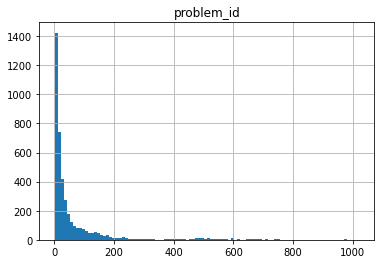

In [95]:
user_prob_distr.hist(column='problem_id', bins = 100)

array([[<AxesSubplot:title={'center':'problem_id'}>]], dtype=object)

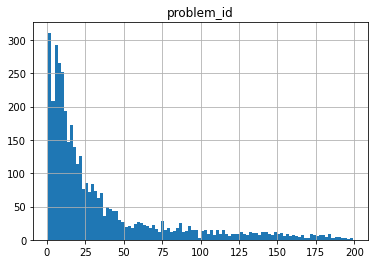

In [96]:
user_prob_distr[user_prob_distr.problem_id < 200].hist(column='problem_id', bins = 100)

In [97]:
len(set(user_prob_distr[user_prob_distr.problem_id < 16].user_id))

1771

## one-hot encoding for the skill ids per user-problem

In [194]:
skill_tags_input = data_skill[['user_id', 'problem_id', 'skill_id']].drop_duplicates()
skill_tags_input.skill_id = skill_tags_input.skill_id.astype('int')
skill_tags_input

,user_id,problem_id,skill_id
337244,73963,76429,297
337245,73963,76430,297
337246,73963,76431,297
337247,73963,76432,297
337248,73963,76433,297
...,...,...,...
19381,96282,135601,9
59154,96282,135602,15
19382,96282,135602,9
19383,96282,135616,9


In [195]:
skill_tags_input = pd.concat([skill_tags_input,pd.get_dummies(skill_tags_input['skill_id'],prefix='skill')], axis=1)
skill_tags_input = skill_tags_input.drop(['skill_id'], axis = 1)
skill_tags_input

,user_id,problem_id,skill_1,skill_2,skill_4,skill_5,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_21,skill_22,skill_24,skill_25,skill_26,skill_27,skill_32,skill_34,skill_35,skill_37,skill_39,skill_40,skill_42,skill_43,skill_46,skill_47,skill_48,skill_49,skill_50,skill_51,skill_53,skill_54,skill_58,skill_61,skill_63,skill_64,skill_65,skill_67,skill_69,skill_70,skill_74,skill_75,skill_76,skill_77,skill_79,skill_80,skill_81,skill_82,skill_83,skill_84,skill_85,skill_86,skill_91,skill_92,skill_94,skill_96,skill_97,skill_99,skill_101,skill_102,skill_104,skill_105,skill_110,skill_163,skill_165,skill_166,skill_173,skill_190,skill_193,skill_203,skill_204,skill_217,skill_221,skill_276,skill_277,skill_278,skill_279,skill_280,skill_290,skill_292,skill_293,skill_294,skill_295,skill_296,skill_297,skill_298,skill_299,skill_301,skill_303,skill_307,skill_308,skill_309,skill_310,skill_311,skill_312,skill_314,skill_317,skill_321,skill_322,skill_323,skill_324,skill_325,skill_331,skill_333,skill_334,skill_340,skill_343,skill_346,skill_348,skill_350,skill_356,skill_362,skill_365,skill_367,skill_368,skill_371,skill_375,skill_378
337244,73963,76429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337245,73963,76430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337246,73963,76431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337247,73963,76432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
337248,73963,76433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,96282,135601,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59154,96282,135602,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19382,96282,135602,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19383,96282,135616,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [196]:
skill_tags_input = skill_tags_input.groupby(['user_id','problem_id'], as_index=False).sum()

In [197]:
skill_tags_input[(skill_tags_input.user_id == 14) & (skill_tags_input.problem_id == 57647)]

,user_id,problem_id,skill_1,skill_2,skill_4,skill_5,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_21,skill_22,skill_24,skill_25,skill_26,skill_27,skill_32,skill_34,skill_35,skill_37,skill_39,skill_40,skill_42,skill_43,skill_46,skill_47,skill_48,skill_49,skill_50,skill_51,skill_53,skill_54,skill_58,skill_61,skill_63,skill_64,skill_65,skill_67,skill_69,skill_70,skill_74,skill_75,skill_76,skill_77,skill_79,skill_80,skill_81,skill_82,skill_83,skill_84,skill_85,skill_86,skill_91,skill_92,skill_94,skill_96,skill_97,skill_99,skill_101,skill_102,skill_104,skill_105,skill_110,skill_163,skill_165,skill_166,skill_173,skill_190,skill_193,skill_203,skill_204,skill_217,skill_221,skill_276,skill_277,skill_278,skill_279,skill_280,skill_290,skill_292,skill_293,skill_294,skill_295,skill_296,skill_297,skill_298,skill_299,skill_301,skill_303,skill_307,skill_308,skill_309,skill_310,skill_311,skill_312,skill_314,skill_317,skill_321,skill_322,skill_323,skill_324,skill_325,skill_331,skill_333,skill_334,skill_340,skill_343,skill_346,skill_348,skill_350,skill_356,skill_362,skill_365,skill_367,skill_368,skill_371,skill_375,skill_378
0,14,57647,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [198]:
len(skill_tags_input)

278876

In [199]:
skill_tags_input

,user_id,problem_id,skill_1,skill_2,skill_4,skill_5,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_21,skill_22,skill_24,skill_25,skill_26,skill_27,skill_32,skill_34,skill_35,skill_37,skill_39,skill_40,skill_42,skill_43,skill_46,skill_47,skill_48,skill_49,skill_50,skill_51,skill_53,skill_54,skill_58,skill_61,skill_63,skill_64,skill_65,skill_67,skill_69,skill_70,skill_74,skill_75,skill_76,skill_77,skill_79,skill_80,skill_81,skill_82,skill_83,skill_84,skill_85,skill_86,skill_91,skill_92,skill_94,skill_96,skill_97,skill_99,skill_101,skill_102,skill_104,skill_105,skill_110,skill_163,skill_165,skill_166,skill_173,skill_190,skill_193,skill_203,skill_204,skill_217,skill_221,skill_276,skill_277,skill_278,skill_279,skill_280,skill_290,skill_292,skill_293,skill_294,skill_295,skill_296,skill_297,skill_298,skill_299,skill_301,skill_303,skill_307,skill_308,skill_309,skill_310,skill_311,skill_312,skill_314,skill_317,skill_321,skill_322,skill_323,skill_324,skill_325,skill_331,skill_333,skill_334,skill_340,skill_343,skill_346,skill_348,skill_350,skill_356,skill_362,skill_365,skill_367,skill_368,skill_371,skill_375,skill_378
0,14,57647,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,14,57695,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14,58551,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,58566,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14,58596,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278871,96299,108981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
278872,96299,108990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
278873,96299,109005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
278874,96299,109008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## answer correctness by order

In [200]:
answer_correctness_input = data_skill[['order_id','user_id','problem_id','correct']].drop_duplicates()

In [201]:
data_processed = pd.merge(answer_correctness_input, skill_tags_input, on = ['user_id','problem_id'], how = 'left')

In [203]:
data_processed

,order_id,user_id,problem_id,correct,skill_1,skill_2,skill_4,skill_5,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_21,skill_22,skill_24,skill_25,skill_26,skill_27,skill_32,skill_34,skill_35,skill_37,skill_39,skill_40,skill_42,skill_43,skill_46,skill_47,skill_48,skill_49,skill_50,skill_51,skill_53,skill_54,skill_58,skill_61,skill_63,skill_64,skill_65,skill_67,skill_69,skill_70,skill_74,skill_75,skill_76,skill_77,skill_79,skill_80,skill_81,skill_82,skill_83,skill_84,skill_85,skill_86,skill_91,skill_92,skill_94,skill_96,skill_97,skill_99,skill_101,skill_102,skill_104,skill_105,skill_110,skill_163,skill_165,skill_166,skill_173,skill_190,skill_193,skill_203,skill_204,skill_217,skill_221,skill_276,skill_277,skill_278,skill_279,skill_280,skill_290,skill_292,skill_293,skill_294,skill_295,skill_296,skill_297,skill_298,skill_299,skill_301,skill_303,skill_307,skill_308,skill_309,skill_310,skill_311,skill_312,skill_314,skill_317,skill_321,skill_322,skill_323,skill_324,skill_325,skill_331,skill_333,skill_334,skill_340,skill_343,skill_346,skill_348,skill_350,skill_356,skill_362,skill_365,skill_367,skill_368,skill_371,skill_375,skill_378
0,20224085,73963,76429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20224095,73963,76430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20224113,73963,76431,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20224123,73963,76432,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20224142,73963,76433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283100,38310198,96282,135605,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283101,38310199,96282,135607,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283102,38310200,96282,135601,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283103,38310201,96282,135602,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## One-hot encoding for answer type

In [204]:
answer_type_input = data_skill[['user_id', 'problem_id', 'answer_type']].drop_duplicates()
answer_type_input

,user_id,problem_id,answer_type
337244,73963,76429,choose_1
337245,73963,76430,choose_1
337246,73963,76431,algebra
337247,73963,76432,choose_1
337248,73963,76433,algebra
...,...,...,...
59151,96282,135605,algebra
59152,96282,135607,algebra
59153,96282,135601,algebra
59154,96282,135602,algebra


In [205]:
answer_type_input = pd.concat([answer_type_input,pd.get_dummies(answer_type_input['answer_type'],prefix='answer_type')], axis=1)
answer_type_input = answer_type_input.drop(['answer_type'], axis = 1)
answer_type_input

,user_id,problem_id,answer_type_algebra,answer_type_choose_1,answer_type_choose_n,answer_type_fill_in_1,answer_type_open_response
337244,73963,76429,0,1,0,0,0
337245,73963,76430,0,1,0,0,0
337246,73963,76431,1,0,0,0,0
337247,73963,76432,0,1,0,0,0
337248,73963,76433,1,0,0,0,0
...,...,...,...,...,...,...,...
59151,96282,135605,1,0,0,0,0
59152,96282,135607,1,0,0,0,0
59153,96282,135601,1,0,0,0,0
59154,96282,135602,1,0,0,0,0


In [206]:
data_processed = pd.merge(data_processed, answer_type_input, on = ['user_id','problem_id'], how = 'left')

# add other continuous features

In [207]:
continuous_input = data_skill[['order_id', 'user_id', 'problem_id', 'ms_first_response', 'hint_count']].drop_duplicates()

In [211]:
data_processed = pd.merge(data_processed, continuous_input, on = ['order_id', 'user_id','problem_id'], how = 'left')
data_processed = data_processed.sort_values('order_id')
data_processed

,order_id,user_id,problem_id,correct,skill_1,skill_2,skill_4,skill_5,skill_8,skill_9,skill_10,skill_11,skill_12,skill_13,skill_14,skill_15,skill_16,skill_17,skill_18,skill_21,skill_22,skill_24,skill_25,skill_26,skill_27,skill_32,skill_34,skill_35,skill_37,skill_39,skill_40,skill_42,skill_43,skill_46,skill_47,skill_48,skill_49,skill_50,skill_51,skill_53,skill_54,skill_58,skill_61,skill_63,skill_64,skill_65,skill_67,skill_69,skill_70,skill_74,skill_75,skill_76,skill_77,skill_79,skill_80,skill_81,skill_82,skill_83,skill_84,skill_85,skill_86,skill_91,skill_92,skill_94,skill_96,skill_97,skill_99,skill_101,skill_102,skill_104,skill_105,skill_110,skill_163,skill_165,skill_166,skill_173,skill_190,skill_193,skill_203,skill_204,skill_217,skill_221,skill_276,skill_277,skill_278,skill_279,skill_280,skill_290,skill_292,skill_293,skill_294,skill_295,skill_296,skill_297,skill_298,skill_299,skill_301,skill_303,skill_307,skill_308,skill_309,skill_310,skill_311,skill_312,skill_314,skill_317,skill_321,skill_322,skill_323,skill_324,skill_325,skill_331,skill_333,skill_334,skill_340,skill_343,skill_346,skill_348,skill_350,skill_356,skill_362,skill_365,skill_367,skill_368,skill_371,skill_375,skill_378,answer_type_algebra,answer_type_choose_1,answer_type_choose_n,answer_type_fill_in_1,answer_type_open_response,ms_first_response,hint_count
0,20224085,73963,76429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,106016,0
1,20224095,73963,76430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,194187,0
2,20224113,73963,76431,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12734,0
3,20224123,73963,76432,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,333484,0
4,20224142,73963,76433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,52828,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283100,38310198,96282,135605,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12402,0
283101,38310199,96282,135607,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10680,0
283102,38310200,96282,135601,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [212]:
data_processed.to_csv(os.path.join(data_dir, 'skill_build_processed.csv'), index = False)